In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
import tensorflow as tf
from tensorflow import keras

from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import os
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [2]:



sns.set()
np.random.seed(0)

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

In [3]:
#importing the banking data using pandas library
Banking_Data = pd.read_csv("C:/Users/aoogb/Desktop/BankData_new.csv", sep=',')
Banking_Data

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,sub_unsub
0,21323,7.000000,9458,1,13301,0,0.000000,0,0,22,8,205,2.000000,0.000000,0.000000,0
1,32936,4.898979,7597,2,23202,0,18.165902,1,1,5,5,326,1.000000,0.000000,0.000000,0
2,11656,7.280110,4154,2,6851,0,30.512293,0,0,27,6,159,1.414214,0.000000,0.000000,0
3,27803,6.324555,9732,2,23202,0,27.313001,1,1,2,2,241,1.000000,16.186414,1.732051,0
4,35916,7.211103,9458,2,13301,0,0.000000,1,0,13,5,179,1.732051,16.031220,2.449490,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65547,43183,7.280110,9458,2,13301,0,24.145393,0,0,17,11,226,1.000000,13.564660,2.000000,1
65548,31957,7.071068,1579,0,13301,0,3.605551,1,0,20,4,76,1.000000,0.000000,0.000000,1
65549,32461,5.656854,5171,2,23202,0,0.000000,1,0,30,4,177,1.414214,0.000000,0.000000,1
65550,29739,6.855655,7597,2,23202,0,18.303005,0,0,17,2,226,1.000000,0.000000,0.000000,1


In [4]:
Banking_Data.drop(['Unnamed: 0'], axis = 1)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,sub_unsub
0,7.000000,9458,1,13301,0,0.000000,0,0,22,8,205,2.000000,0.000000,0.000000,0
1,4.898979,7597,2,23202,0,18.165902,1,1,5,5,326,1.000000,0.000000,0.000000,0
2,7.280110,4154,2,6851,0,30.512293,0,0,27,6,159,1.414214,0.000000,0.000000,0
3,6.324555,9732,2,23202,0,27.313001,1,1,2,2,241,1.000000,16.186414,1.732051,0
4,7.211103,9458,2,13301,0,0.000000,1,0,13,5,179,1.732051,16.031220,2.449490,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65547,7.280110,9458,2,13301,0,24.145393,0,0,17,11,226,1.000000,13.564660,2.000000,1
65548,7.071068,1579,0,13301,0,3.605551,1,0,20,4,76,1.000000,0.000000,0.000000,1
65549,5.656854,5171,2,23202,0,0.000000,1,0,30,4,177,1.414214,0.000000,0.000000,1
65550,6.855655,7597,2,23202,0,18.303005,0,0,17,2,226,1.000000,0.000000,0.000000,1


In [5]:
X = Banking_Data.drop('sub_unsub',axis='columns')
y = Banking_Data['sub_unsub']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [7]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Training Accuracy is:  1.0
Random forest Accuracy is:  0.9808557699641522


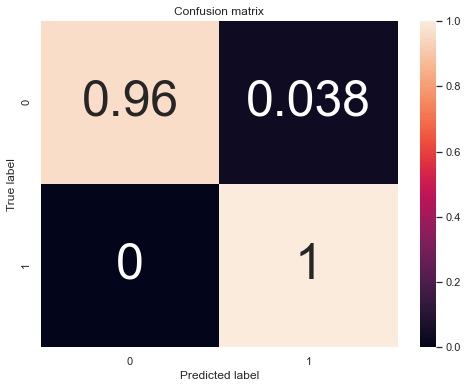

In [8]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

# source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Random forest Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

Training Accuracy is:  1.0
Random forest Accuracy is:  0.9808557699641522


Text(66.5, 0.5, 'Truth')

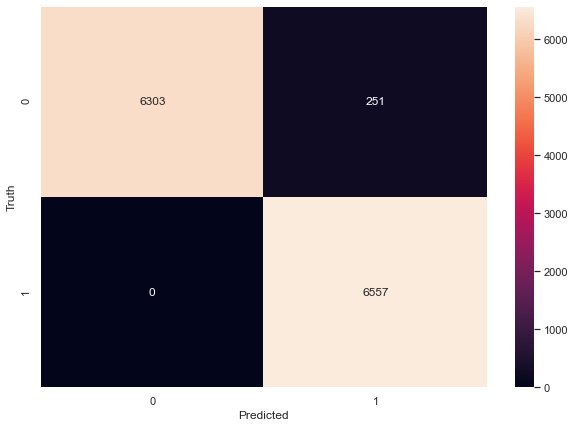

In [9]:
ypred_model = rf.predict(X_test)
ypred_model[:5]

y_pred = []
for element in ypred_model:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
y_pred[:10]

y_test[:10]

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Random forest Accuracy is: ", rf.score(X_test, y_test))
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Training Accuracy is:  1.0
Random forest Accuracy is:  0.9808557699641522


Text(66.5, 0.5, 'Truth')

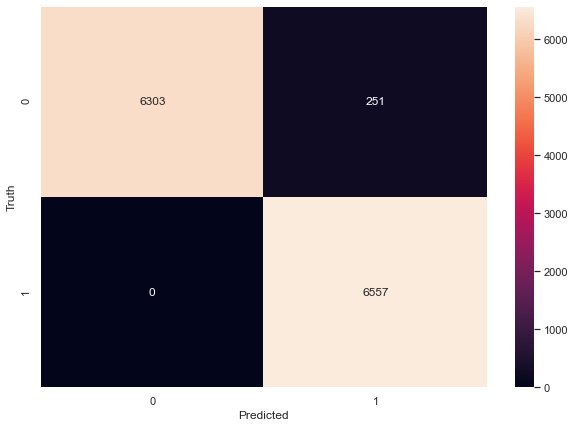

In [10]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Random forest Accuracy is: ", rf.score(X_test, y_test))
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Classification accuracy on test set with max features = 1 and max_depth = None: 0.984
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.805
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.813
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.820
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.833
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.981
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.802
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.831
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.849
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.868
Classification accuracy on test set with max features = log2 and max_depth = None: 0.981
Classification accuracy on test set with max features = log2

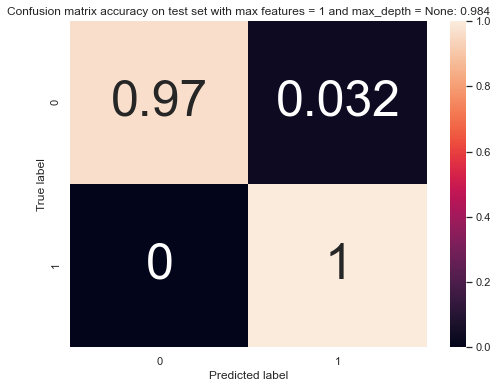

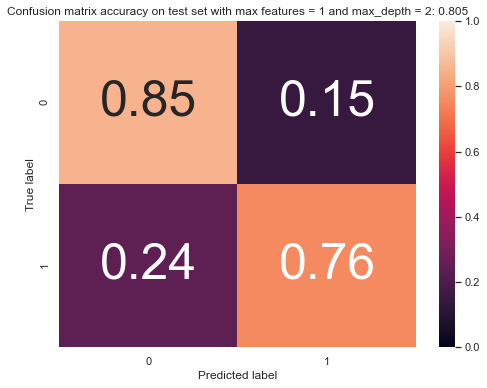

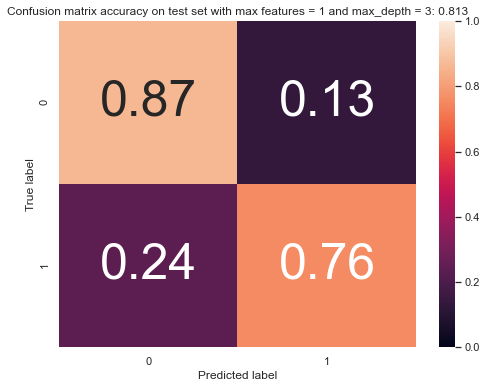

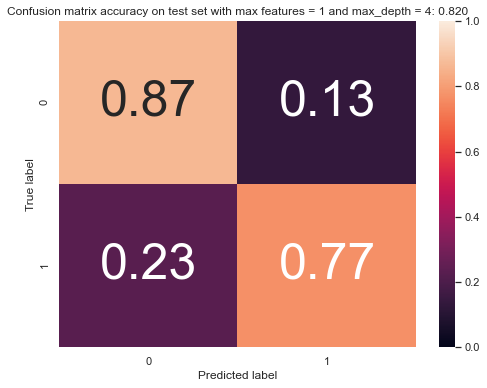

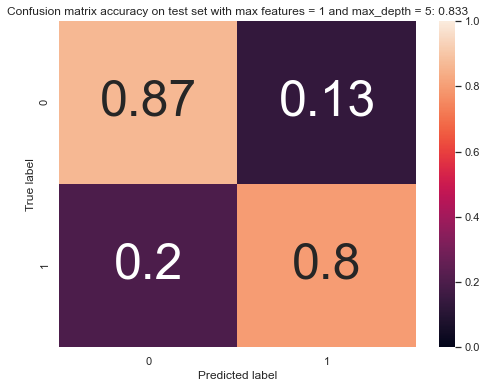

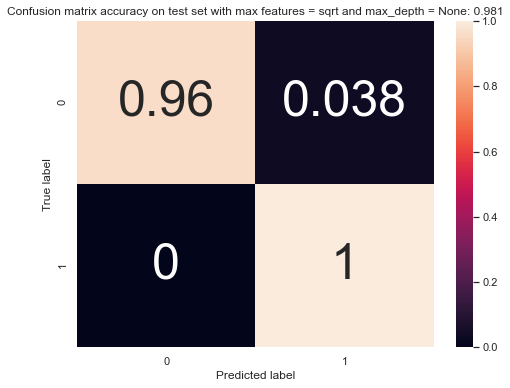

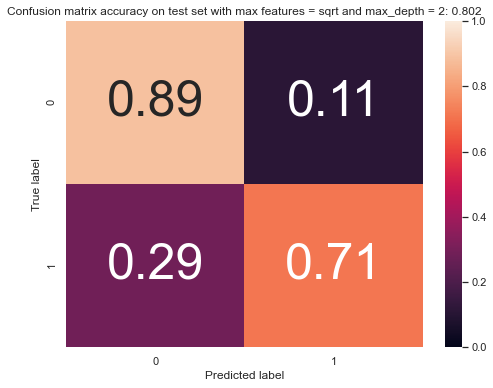

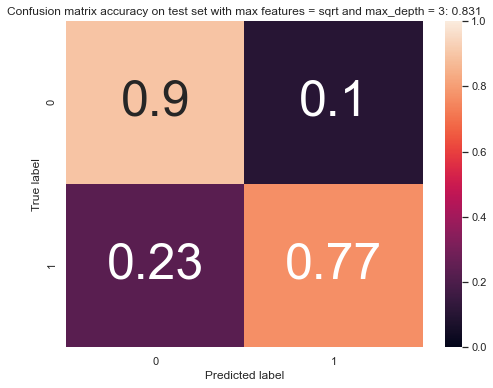

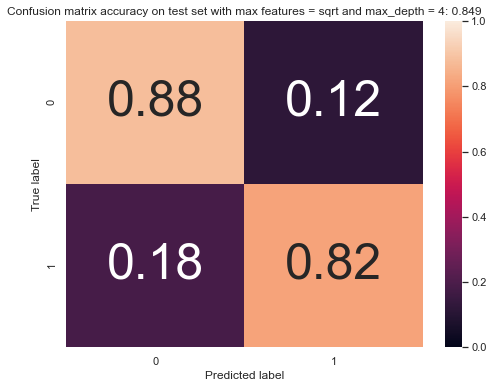

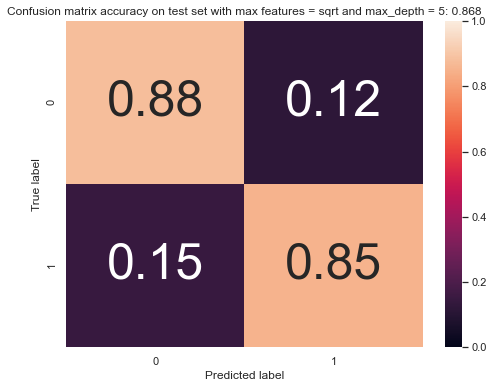

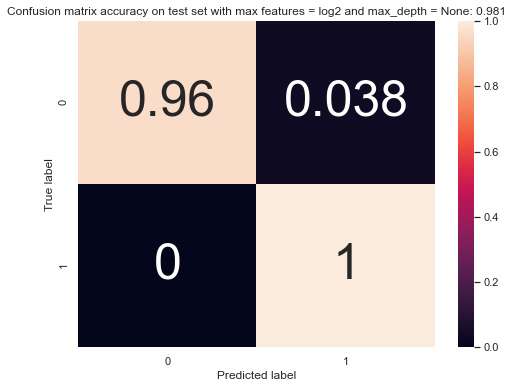

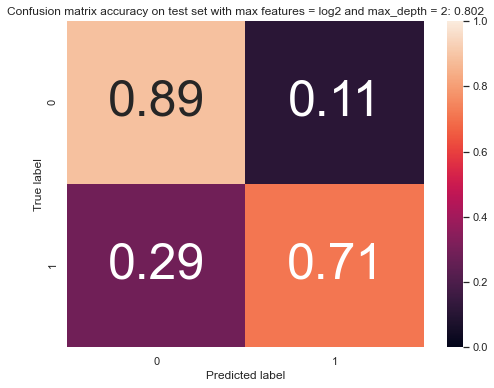

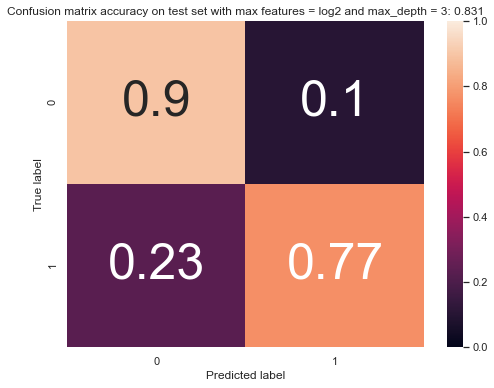

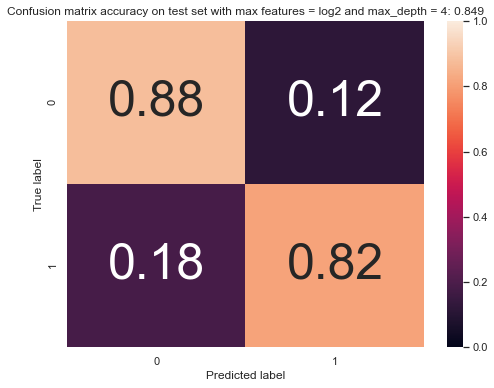

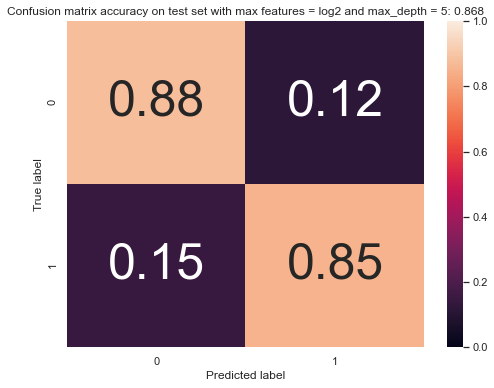

In [11]:
# Tunning Random Forest

from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, ypred_model)
auc = metrics.roc_auc_score(y_test,ypred_model)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('Plot of ROC Curve for Logistic regression')
plt.show()

In [13]:
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm1 = confusion_matrix(y_test, prediction_test)
    print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)



Classification accuracy on test set with max features = 1 and max_depth = None: 0.984
Confusion Matrix : 
 [[6347  207]
 [   0 6557]]
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.805
Confusion Matrix : 
 [[5598  956]
 [1600 4957]]
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.813
Confusion Matrix : 
 [[5677  877]
 [1577 4980]]
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.820
Confusion Matrix : 
 [[5680  874]
 [1486 5071]]
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.833
Confusion Matrix : 
 [[5679  875]
 [1314 5243]]
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.981
Confusion Matrix : 
 [[6305  249]
 [   0 6557]]
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.802
Confusion Matrix : 
 [[5837  717]
 [1880 4677]]
Classification accuracy on test set with max features = sqrt and max_de

Classification accuracy on test set with max features = 1 and max_depth = None: 0.984
Confusion Matrix : 
 [[6347  207]
 [   0 6557]]
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.805
Confusion Matrix : 
 [[5598  956]
 [1600 4957]]
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.813
Confusion Matrix : 
 [[5677  877]
 [1577 4980]]
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.820
Confusion Matrix : 
 [[5680  874]
 [1486 5071]]
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.833
Confusion Matrix : 
 [[5679  875]
 [1314 5243]]
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.981
Confusion Matrix : 
 [[6305  249]
 [   0 6557]]
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.802
Confusion Matrix : 
 [[5837  717]
 [1880 4677]]
Classification accuracy on test set with max features = sqrt and max_de

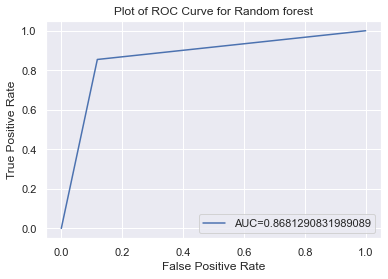

In [17]:
from sklearn import metrics
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm1 = confusion_matrix(y_test, prediction_test)
    print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)


fpr, tpr, _ = metrics.roc_curve(y_test, prediction_test)
auc = metrics.roc_auc_score(y_test,prediction_test)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('Plot of ROC Curve for Random forest')
plt.show()

In [22]:
fpr, tpr # False positive and True Positive Rate 

(array([0.000000, 0.118401, 1.000000]), array([0.000000, 0.854659, 1.000000]))